# Exploratory Data Analysis for 500 of the Greatest movies of all time - IMDb

In [10]:
# Importing relevant libraries
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

sns.set()

In [ ]:
# Create a list for all pages
pages = list(range(1,7))

# Create lists for columns needed for data frame
title = []
runtime = []
genre = []
imdb_rating = []
year = []
metascore = []
director_names = [] 
actors_names = []
gross = []

# Loop through all ages to get information
for page in tqdm(pages):
    params = {
        'st_dt': '',
        'mode': 'detail',
        'page': page,
        'sort': 'list_order,asc'
    }

    web_page_url = 'https://www.imdb.com/list/ls062911411/'

    response = requests.get(web_page_url, params=params)


    # create an instance of beautiful soup for film information
    film_soup = BeautifulSoup(response.content, 'html.parser') 

    # Get the divs where the movie information is located
    film_info = film_soup.find_all('div', class_= 'lister-item-content')

    

    # Loop through film_info object to extract necessary information
    for item in tqdm(film_info):
        title.append((item.a.string))

        time_ = item.find('span', class_ = 'runtime')
        runtime.append(time_.string)

        genre_= item.find('span', class_ = 'genre')
        genre.append(((genre_.string).replace('\n', '')).strip())

        rate = item.find('span',class_ = 'ipl-rating-star__rating')
        imdb_rating.append(float(rate.string))

        year_ = item.find('span', class_ = 'lister-item-year text-muted unbold').string.split()
        if len(year_) <= 1:
            year.append(int(year_[0][1:5]))
        else:
            year.append(int(year_[1][1:5]))
        
        if item.find('span', class_ = 'metascore favorable') == None:
            metascore.append(np.nan)
        else:
            metascore_ = item.find('span', class_ = 'metascore favorable').string.strip()
            metascore.append(int(metascore_))
        

    # Create an instance of beautiful soup for directors and actors information
    directors_actors_soup = BeautifulSoup(response.content, 'html.parser')

    # Retrieve all tags and links that have directors and actors information
    director_links = directors_actors_soup.find_all('p', {'class': 'text-muted text-small'})

    directors_info = []
    for links in director_links:
        directors_info.append(links.a)

    # Retreving director names. Ensuring the list is 100
    for name in tqdm(directors_info):
        if name != None:
            director_names.append(name.string)

    # Retreive actors information
    actors_links = []
    for each_tag in directors_actors_soup.find_all('p', {'class': 'text-muted text-small'}):
        if each_tag.find_all('a') != []:
            actors_links.append(each_tag.findAll('a')[1:])

    
    for links in actors_links:
        each_name = []
        for each_link in tqdm(links):
            each_name.append(each_link.string)
        actors_names.append(each_name)


    # Retrieve list for gross
    list_of_grossEarnings = []
    for i in directors_actors_soup.find_all('p', {'class': 'text-muted text-small'}):
        list_of_grossEarnings.append(i.findAll('span', {'name': 'nv' }))

    
    for lists in tqdm(list_of_grossEarnings):
        if len(lists) > 1:
            gross.append(lists[1].string)
        elif len(lists) == 1:
            gross.append('N/A')

print('Done Scrapping!')

In [20]:
# Check each list to ensure we have 517 entries
check = [title, runtime, genre, imdb_rating, year, metascore, director_names, actors_names,
         gross]
for each_list in check:
    print(len(each_list))

517
517
517
517
517
517
517
517
517


In [21]:
# Putting our data in a data frame
data_frame = pd.DataFrame({'Movie_title': title, 'Genre': genre, 'Director': director_names, 'Actors': actors_names, 'Duration': runtime, 'Year': year, 'IMDB Rating': imdb_rating, 'Meta Score': metascore, 'Gross earnings': gross}, index=range(1, len(title)+1))
data_frame

,Movie_title,Genre,Director,Actors,Duration,Year,IMDB Rating,Meta Score,Gross earnings
1,Citizen Kane,"Drama, Mystery",Orson Welles,"[Orson Welles, Joseph Cotten, Dorothy Comingor...",119 min,1941,8.3,100.0,$1.59M
2,The Godfather,"Crime, Drama",Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",175 min,1972,9.2,100.0,$134.97M
3,The Wizard of Oz,"Adventure, Family, Fantasy",Victor Fleming,"[George Cukor, Mervyn LeRoy, Norman Taurog, Ri...",102 min,1939,8.1,92.0,$2.08M
4,The Shawshank Redemption,Drama,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",142 min,1994,9.3,82.0,$28.34M
5,Pulp Fiction,"Crime, Drama",Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",154 min,1994,8.9,95.0,$107.93M
...,...,...,...,...,...,...,...,...,...
513,From Here to Eternity,"Drama, Romance, War",Fred Zinnemann,"[Burt Lancaster, Montgomery Clift, Deborah Ker...",118 min,1953,7.6,85.0,$30.50M
514,Walk the Line,"Biography, Drama, Music",James Mangold,"[Joaquin Phoenix, Reese Witherspoon, Ginnifer ...",136 min,2005,7.8,72.0,$119.52M
515,The Last Emperor,"Biography, Drama, History",Bernardo Bertolucci,"[John Lone, Joan Chen, Peter O'Toole, Ruocheng...",163 min,1987,7.7,76.0,$43.98M
516,Mutiny on the Bounty,"Adventure, Biography, Drama",Frank Lloyd,"[Charles Laughton, Clark Gable, Franchot Tone,...",132 min,1935,7.6,87.0,N/A


In [22]:
# Exploring Shape of the data frame
data_frame.shape

(517, 9)

The results show that we have the top 100 movies

In [23]:
# checking for null values
data_frame.isnull().any()

Movie_title       False
Genre             False
Director          False
Actors            False
Duration          False
Year              False
IMDB Rating       False
Meta Score         True
Gross earnings    False
dtype: bool

Some of the movies did not have a metascore assigned and so missing values were replaced with NaN

In [24]:
# Checking data types of each column
data_frame.dtypes

Movie_title        object
Genre              object
Director           object
Actors             object
Duration           object
Year                int64
IMDB Rating       float64
Meta Score        float64
Gross earnings     object
dtype: object

We need to convert duration and gross earnings to numerical values

In [25]:
def convert_gross(x):
    '''This function converts gross earnings to float'''
    if x == 'N/A':
        return np.nan
    else:
        converted = x.replace('$', '').replace('M', '')
        return float(converted)
    

# Converting Gross earnings to float
data_frame['Gross earnings'] = data_frame['Gross earnings'].map(convert_gross)

In [26]:
# Converting Duration to numerical
data_frame['Duration'] = data_frame['Duration'].str.extract('(\d+)').astype(int)

In [27]:
# Renaming columns in the data frame
data_frame.rename(columns={'Gross earnings': 'Gross earnings in millions ($)', 'Duration': 'Duration (mins)'}, inplace= True)
data_frame.head()

,Movie_title,Genre,Director,Actors,Duration (mins),Year,IMDB Rating,Meta Score,Gross earnings in millions ($)
1,Citizen Kane,"Drama, Mystery",Orson Welles,"[Orson Welles, Joseph Cotten, Dorothy Comingor...",119,1941,8.3,100.0,1.59
2,The Godfather,"Crime, Drama",Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",175,1972,9.2,100.0,134.97
3,The Wizard of Oz,"Adventure, Family, Fantasy",Victor Fleming,"[George Cukor, Mervyn LeRoy, Norman Taurog, Ri...",102,1939,8.1,92.0,2.08
4,The Shawshank Redemption,Drama,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",142,1994,9.3,82.0,28.34
5,Pulp Fiction,"Crime, Drama",Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",154,1994,8.9,95.0,107.93


## Data Visualization

We also want to visualize the most frequent genres in the greatest movies of all time. The best way to achieve this is using word clouds.

In [32]:
# Covert genres to a long string
genres_txt = ' '.join(data_frame['Genre'])

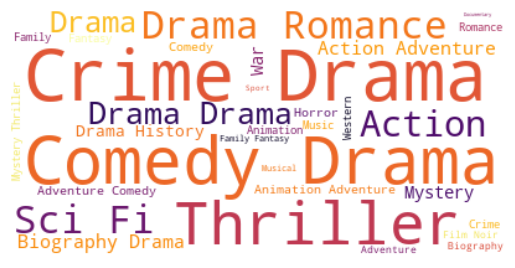

In [33]:
# Set stop words
stopwords = set(STOPWORDS)

# instantiate a word cloud object
genre_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    colormap= 'inferno'
)

# generate the word cloud
genre_wc.generate(genres_txt)

# display the word cloud
plt.imshow(genre_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

From  the result we can see that the most popular genres are **Cime Drama, Comedy Drama, Thriller and Sci-fi**.

In [ ]:
metascores = data_frame.sort_values(by=['Meta Score'], ascending= False).reset_index(drop = True)
IMDb = data_frame.sort_values(by=['IMDB Rating'], ascending= False).reset_index(drop= True)

In [ ]:
sns.histplot(data = metascores, y = 'Genre')

In [ ]:
sns.histplot(data = IMDb, y = 'Genre')

We are also interested in exploring directors with the highest number of films. We can view this by grouping by directors.

In [34]:
frequent_directors = data_frame.groupby('Director').count().sort_values(by=['Movie_title'], ascending= False).head(10).reset_index()
frequent_directors

,Director,Movie_title,Genre,Actors,Duration (mins),Year,IMDB Rating,Meta Score,Gross earnings in millions ($)
0,Steven Spielberg,11,11,11,11,11,11,11,11
1,Alfred Hitchcock,10,10,10,10,10,10,10,8
2,Stanley Kubrick,8,8,8,8,8,8,8,6
3,Martin Scorsese,8,8,8,8,8,8,8,8
4,Akira Kurosawa,7,7,7,7,7,7,6,4
5,Christopher Nolan,6,6,6,6,6,6,6,6
6,Quentin Tarantino,6,6,6,6,6,6,6,6
7,Hayao Miyazaki,6,6,6,6,6,6,6,5
8,Billy Wilder,6,6,6,6,6,6,6,5
9,Charles Chaplin,5,5,5,5,5,5,2,5


<AxesSubplot: xlabel='Movie_title', ylabel='Director'>

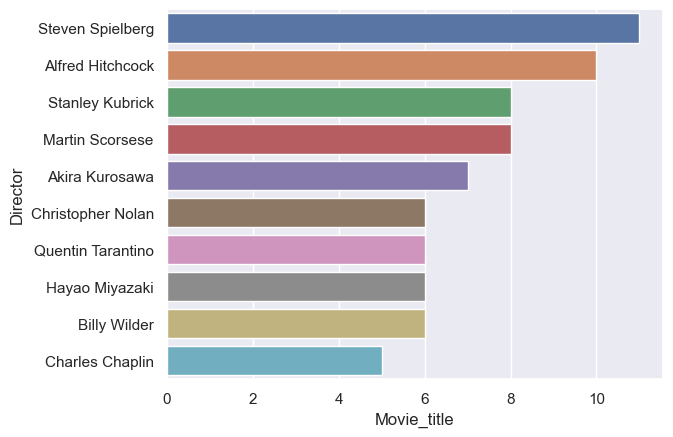

In [35]:
sns.barplot(data = frequent_directors, y = 'Director',x = 'Movie_title')

From the result we can see that there are two directors who have high number of movies; **Alfred Hitchcock and Steven Spielberg** followed by	
**Stanley Kubrick and Martin Scorsese**


## IMDb vs Meta Score

While both ratings provide a way to gauge the quality or reception of a movie, IMDb ratings are driven by the opinions of the general public, while Metascore reflects the assessments of professional critics

First we plot the frequency the ratings from IMDB and Metacritic

Text(0.5, 1.0, 'Frequency of Meta score ratings')

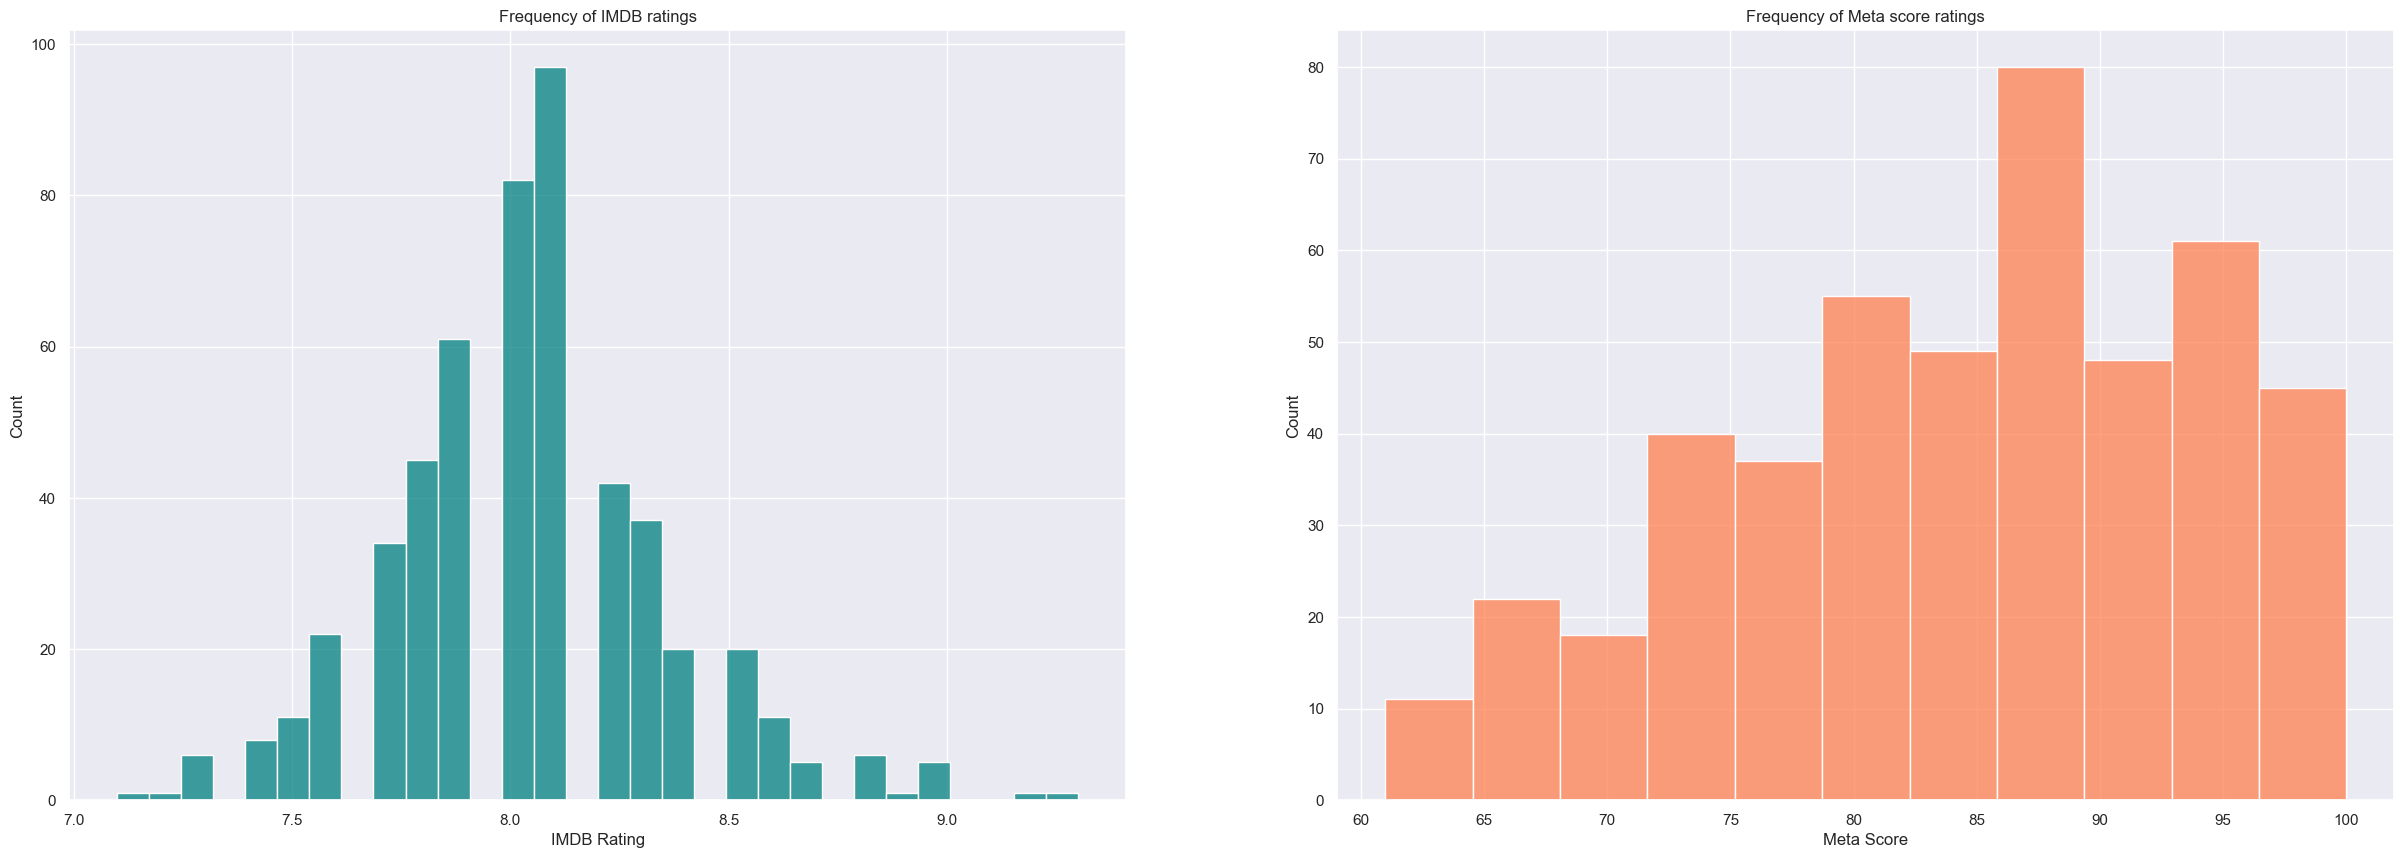

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

sns.histplot(data_frame['IMDB Rating'].sort_values(), color= 'teal', ax=axes[0])
axes[0].set_title('Frequency of IMDB ratings')

sns.histplot(data_frame['Meta Score'].sort_values(), color= 'coral', ax=axes[1])
axes[1].set_title('Frequency of Meta score ratings')



From the results we can see that most of the movies were rated about 8.1 by IMDb and about 87 by Meta critic

## Correlation between IMDb and Meta Score

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_17868\4110068154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desnity_dist['IMDB Rating'] = desnity_dist['IMDB Rating'].map(lambda x: x * 10)


Text(0.5, 1.0, 'Distribution plot for IMDB scores and Meta Scores')

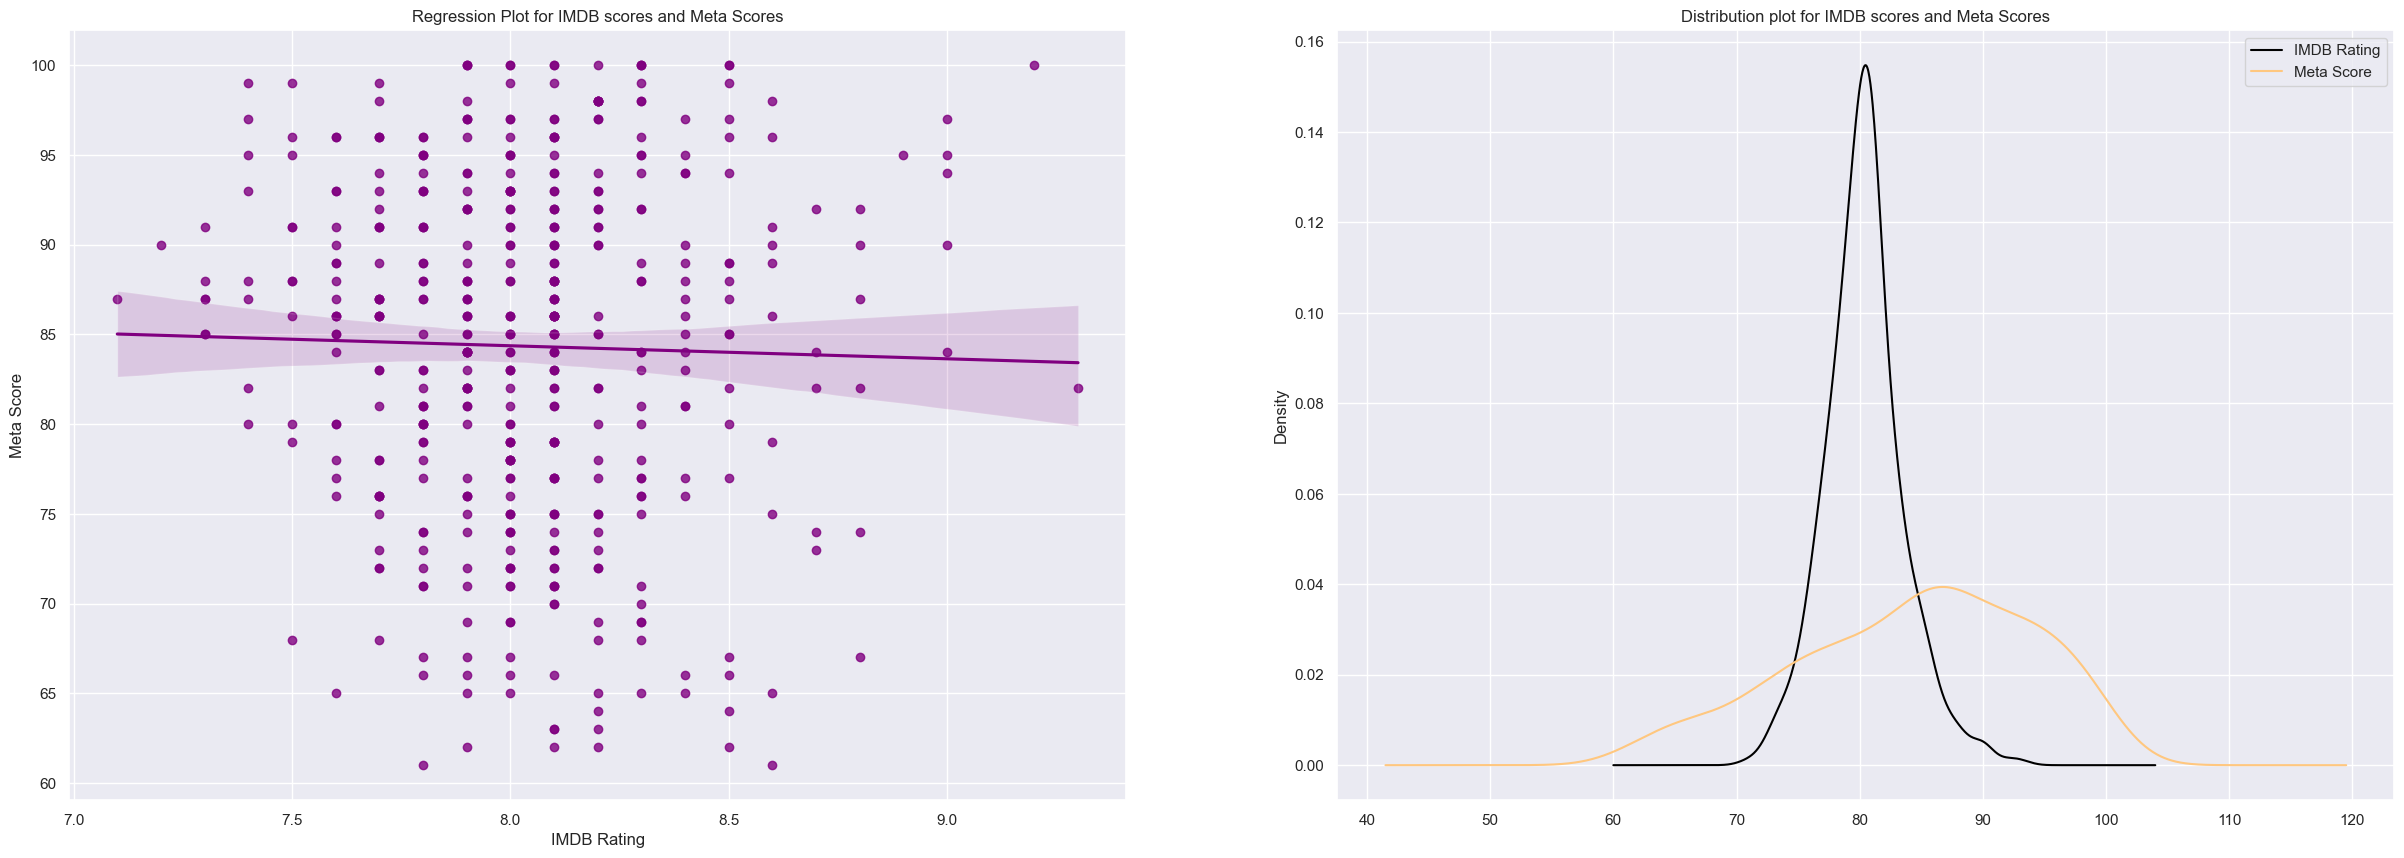

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

sns.regplot(data= data_frame, x = 'IMDB Rating', y = 'Meta Score', color='purple' , ax=axes[0])
axes[0].set_title('Regression Plot for IMDB scores and Meta Scores')

desnity_dist = data_frame[['IMDB Rating', 'Meta Score']]
desnity_dist['IMDB Rating'] = desnity_dist['IMDB Rating'].map(lambda x: x * 10)
desnity_dist.plot(kind= 'kde', colormap= 'copper', ax=axes[1])
axes[1].set_title('Distribution plot for IMDB scores and Meta Scores')

From the plots, we can conclude that there is no correlation between how critics voted and how IMDb users voted.

## Movies with highest Meta Score Vs Movies with highest IMDb rating

In [37]:
top_10_metascore = data_frame.sort_values(by=['Meta Score'], ascending= False).head(10).reset_index(drop = True)
top_10_IMDB = data_frame.sort_values(by=['IMDB Rating'], ascending= False).head(10).reset_index(drop= True)


Text(0.5, 1.0, 'Top 10 Meta Score Rating')

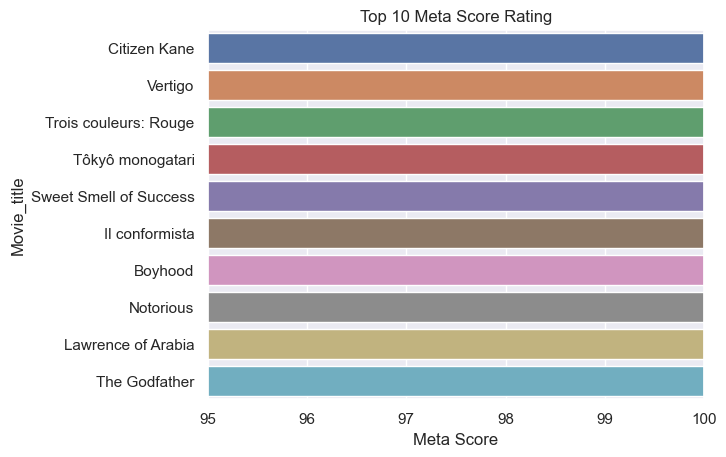

In [38]:
sns.barplot(data = top_10_metascore, x = 'Meta Score', y= 'Movie_title')
plt.xlim(95,100)
plt.title('Top 10 Meta Score Rating')

Text(0.5, 1.0, 'Top 10 IMDB Rating')

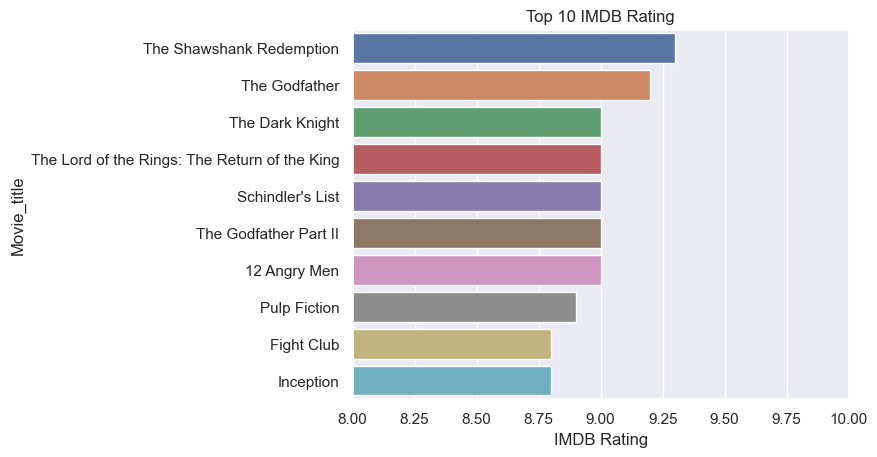

In [39]:
sns.barplot(data = top_10_IMDB, x = 'IMDB Rating', y= 'Movie_title')
plt.xlim(8,10)
plt.title('Top 10 IMDB Rating')

From the two graphs we can see that the only interception was **The Godfather**

Text(0.5, 1.0, 'IMDB Ratings through out the years')

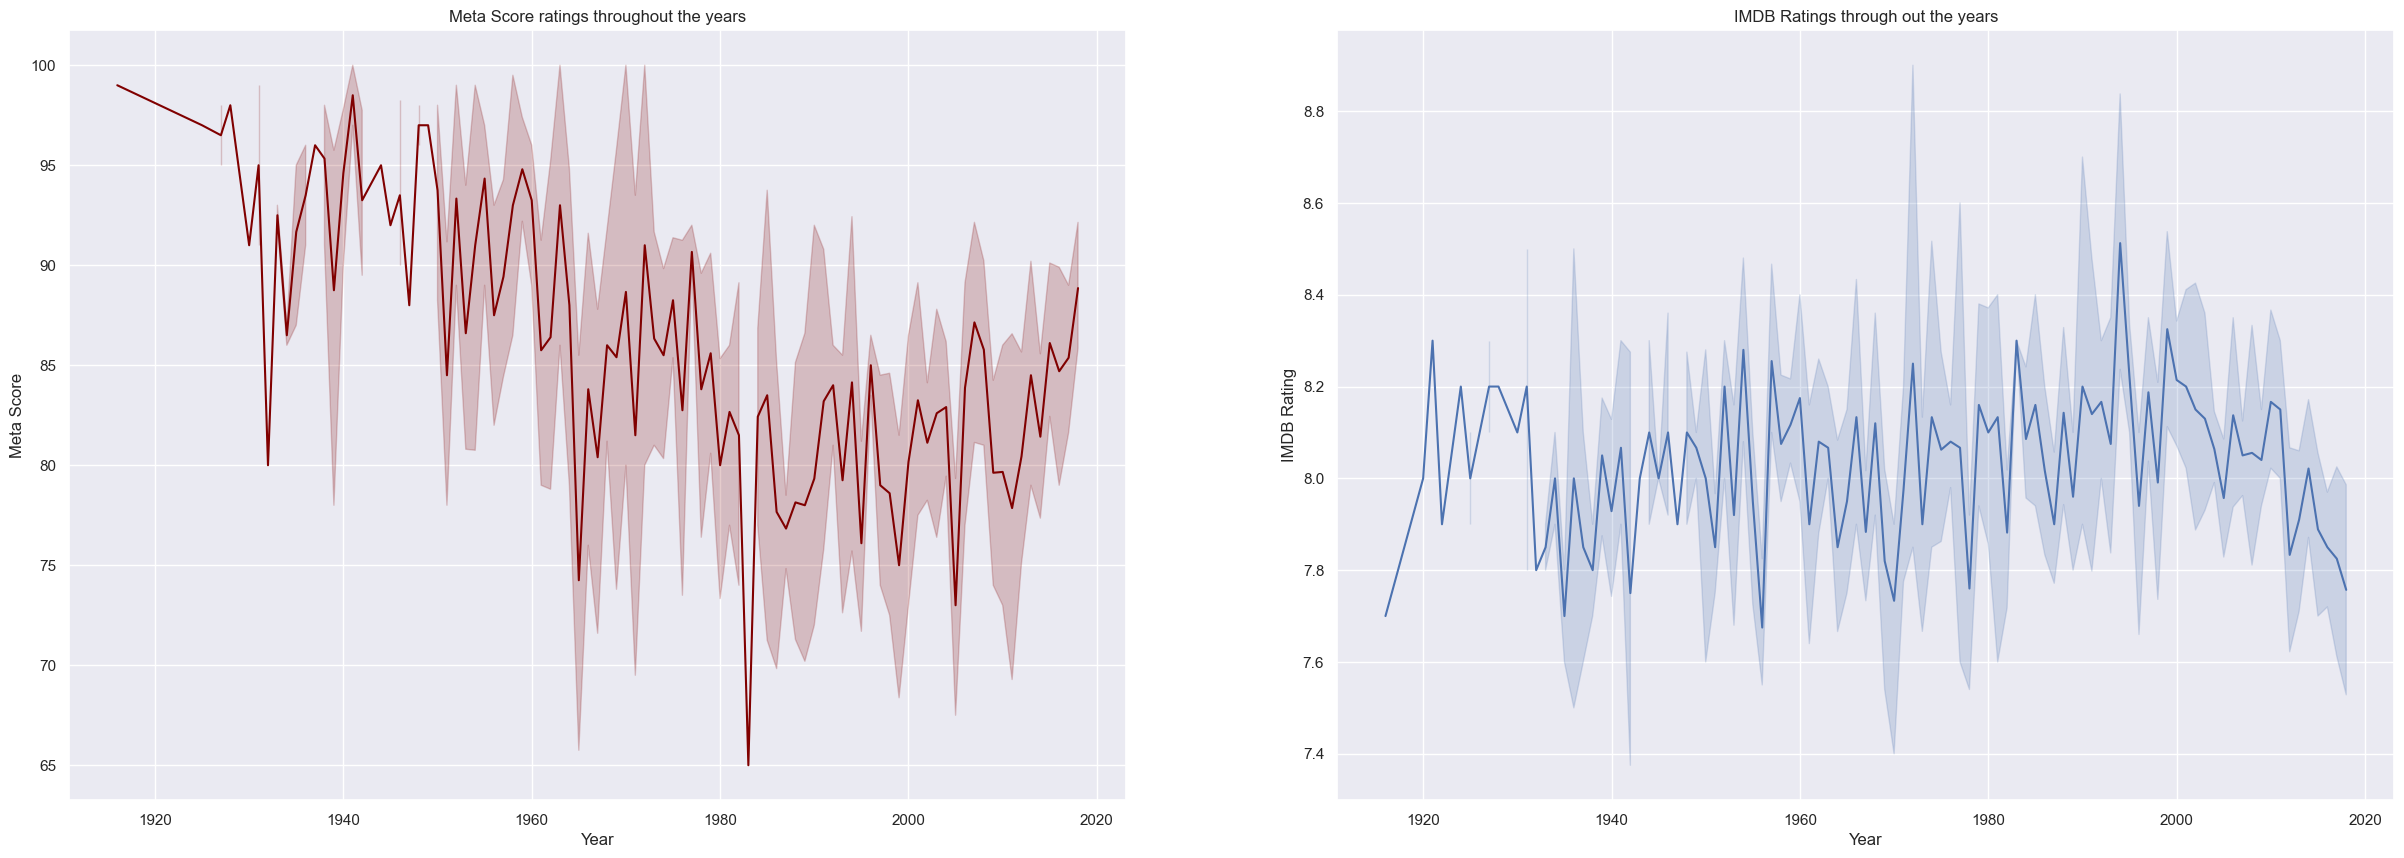

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
sns.lineplot(data= data_frame, x= 'Year', y= 'Meta Score', color = 'maroon', ax=axes[0])
axes[0].set_title('Meta Score ratings throughout the years')

sns.lineplot(data= data_frame, x= 'Year', y= 'IMDB Rating', ax=axes[1])
axes[1].set_title('IMDB Ratings through out the years')

From the graph we can interpret the following:
* Accoring to Metacritic, there was a decline in ratings for movies released between early to mid 80's.
* IMDb user's ratings have remained consistent over the years

## Frequent genres in top 10 IMDb and MetaCritic ratings

In [ ]:
top_10_metascore = data_frame.sort_values(by=['Meta Score'], ascending= False).head(10).reset_index(drop = True)
top_10_IMDB = data_frame.sort_values(by=['IMDB Rating'], ascending= False).head(10).reset_index(drop= True)

Text(0.5, 1.0, 'Top 10 Metascore')

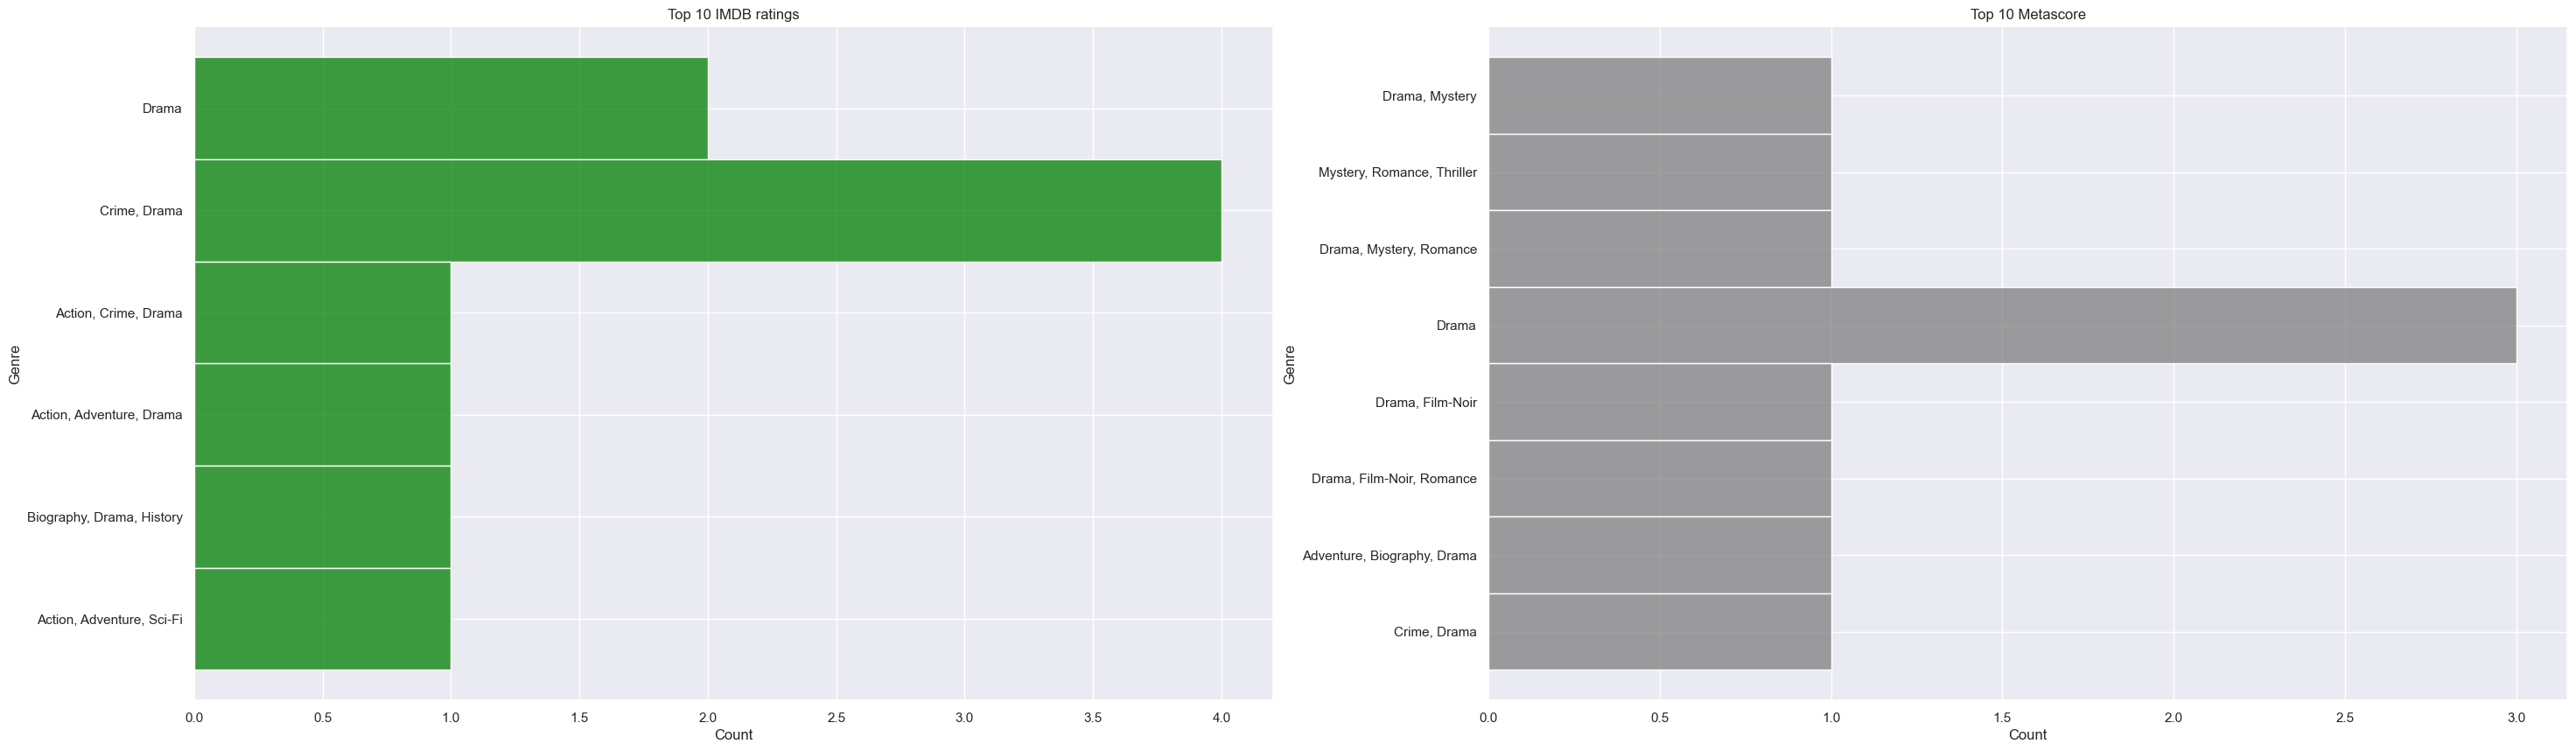

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(35, 10))

sns.histplot(y = top_10_IMDB['Genre'], color= 'green', ax=axes[0])
axes[0].set_title('Top 10 IMDB ratings')

sns.histplot(y = top_10_metascore['Genre'], color= 'grey', ax=axes[1])
axes[1].set_title('Top 10 Metascore')


Most frequent genres are **Crime dramas** and **Dramas**

## Correlation between Gross earnings, Duaration, MetaScore and IMDb ratings

<AxesSubplot: >

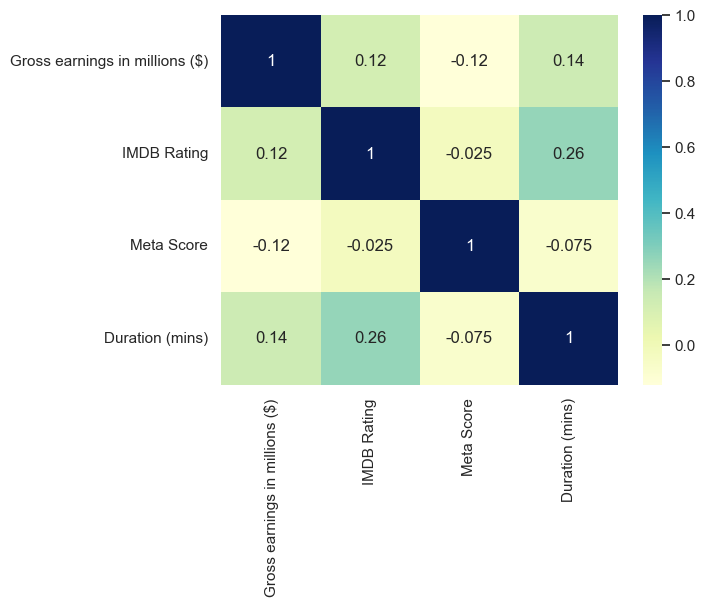

In [42]:
sns.heatmap(data_frame[['Gross earnings in millions ($)','IMDB Rating', 'Meta Score', 'Duration (mins)']].corr(), cmap='YlGnBu', annot= True)

There is no significant positive or negetive correlation between IMDb ratings, Meta score, Gross earnings and the Duration of the movie.

## Insights and observations:
* The length of a film and its box office earnings did not ensure positive reviews.
* There was a disparity between the preferences of average IMDb viewers and the criteria that critics use to judge a film's greatness.
* Crime dramas and dramas were likely to receive high ratings from both IMDb users and Metacritic.
* Movies directed by Steven Spielberg and Martin Scorsese are highly likely to get excellent reviews.